In [1]:
from astropy.io import fits, ascii
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
import functions as func
import matplotlib.pyplot as plt
import pdb, glob, mpld3
from mpld3 import plugins
from photutils.datasets import make_4gaussians_image
from photutils import centroid_2dg

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 8)
mpld3.enable_notebook()

# BCD 2506

In [2]:
bcd_2506 = np.sort(glob.glob("../ngc2506/unzipped_AORs/ch1/bcd/*_bcd.fits"))
hdu = fits.open(bcd_2506[1]) 
header = hdu[0].header
image = hdu[0].data

In [3]:
header

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / FOUR-BYTE SINGLE PRECISION FLOATING POINT      
NAXIS   =                    2 / STANDARD FITS FORMAT                           
NAXIS1  =                  256 / STANDARD FITS FORMAT                           
NAXIS2  =                  256 / STANDARD FITS FORMAT                           
ORIGIN  = 'Spitzer Science Center' / Organization generating this FITS file     
CREATOR = 'S18.25.0'           / SW version used to create this FITS file       
TELESCOP= 'Spitzer '           / SPITZER Space Telescope                        
INSTRUME= 'IRAC    '           / SPITZER Space Telescope instrument ID          
CHNLNUM =                    1 / 1 digit instrument channel number              
EXPTYPE = 'sci     '           / Exposure Type                                  
REQTYPE = 'AOR     '           / Request type (AOR, IER, or  SER)               
AOT_TYPE= 'IracMap '        

In [15]:
bcd_2506[3]

'../ngc2506/unzipped_AORs/ch1/bcd/SPITZER_I1_17133824_0003_0000_3_bcd.fits'

In [6]:
for bcd in bcd_2506:
    hdu = fits.open(bcd)
    header = hdu[0].header
    hdu.close()
    print header['EXPTIME']

1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8
1.0
26.8


In [10]:
src_info = ascii.read("../g_starsNGC2506.csv")
src_info

Name,Color (g-r),g,SpType,ra,dec,K mag,K mag err,coord hms
str16,float64,float64,str4,float64,float64,float64,float64,str26
O-0759528-104352,0.4235,18.0015,G0 V,119.970225,-10.7311305556,16.048,0.01,07 59 52.854 -10 43 52.07
O-0800002-104721,0.372,17.7181,G0 V,120.000845833,-10.7893113889,15.976,0.009,08 00 00.203 -10 47 21.521
O-0800006-104343,0.4452,18.1195,G0 V,120.002716667,-10.7287272222,16.178,0.011,08 00 00.652 -10 43 43.418
O-0800021-104626,0.3754,17.9093,G0 V,120.009125,-10.7740391667,16.113,0.011,08 00 02.19 -10 46 26.541
O-0800000-104222,0.5093,18.623,G5 V,120.0003875,-10.7061413889,16.313,0.013,08 00 00.093 -10 42 22.109
O-0800285-104151,0.4357,18.0596,G5 V,120.118891667,-10.6975613889,16.178,0.011,08 00 28.534 -10 41 51.221


In [11]:
src_crd = np.array([src_info['ra'], src_info['dec']]).T
src_crd

array([[ 119.970225  ,  -10.73113056],
       [ 120.00084583,  -10.78931139],
       [ 120.00271667,  -10.72872722],
       [ 120.009125  ,  -10.77403917],
       [ 120.0003875 ,  -10.70614139],
       [ 120.11889167,  -10.69756139]])

In [30]:
w = WCS(header)
src_pixcrd = w.wcs_world2pix(src_crd,1)
src_pixcrd

array([[  41.60591397, -243.74525852],
       [-112.86109724, -128.60366332],
       [  63.91700065, -152.18992587],
       [ -64.61571575, -112.27660004],
       [ 128.39209159, -169.61843095],
       [ 209.15243848,  164.44182284]])

nan
nan
nan
nan
nan
nan


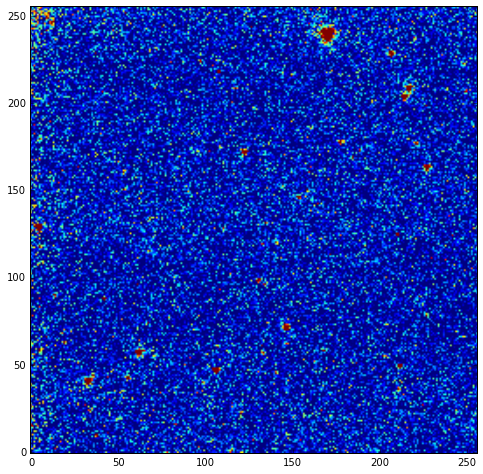

In [7]:
fig, ax = plt.subplots()
ax.imshow(image, origin = 'lower', vmin = 0, vmax = 4)
for crd in src_pixcrd:
    flux, ap = func.photometry(image, [crd[0]], [crd[1]], rad = 2.25)
    bkg_ap = func.photometry(image, [crd[0]], [crd[1]], shape = 'CircAnn', r_in = 4, r_out = 5)[1]
    ap.plot(color='r',linewidth=2)
    bkg_ap.plot(color='y', linewidth=2)
    print flux

plugins.connect(fig, plugins.MousePosition(fontsize=14))

### Coordinate conversion problem

In [8]:
bcd_2506[19][54:57]

'019'

In [9]:
for bcd in bcd_2506:
    
    hdu    = fits.open(bcd)
    header = hdu[0].header
    image  = hdu[0].data
    hdu.close()
    
    w = WCS(header)
    src_pixcrd = w.wcs_world2pix(src_crd,1)
    
    plt.imshow(image, origin = 'lower', vmin = 0, vmax = 4)
    
    count = 0
    for pix in src_pixcrd:
        if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
            flux, ap = func.photometry(image, [pix[0]], [pix[1]], rad = 3)
            ap.plot(color='y',linewidth=1)
        else:
            count += 1
    
    if count < 6:
        fname = '../source2506_crd_test/bcd2506_' + bcd[54:57] + '.pdf'
        plt.title(bcd[54:57])
        plt.savefig(fname)
        plt.clf()
    else:
        plt.clf()

plt.close()

Findings:
- Every even numbered image is most likely a correction image and is not useful for now.
- FOV does not cover the entire cluster, so targets are not going to be detected every time.
- Among the odd numbered images, some don't contain any target. The last usefull one is bcd155. 

### Centering

In [29]:
mpld3.disable_notebook()

/home/rafia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/home/rafia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


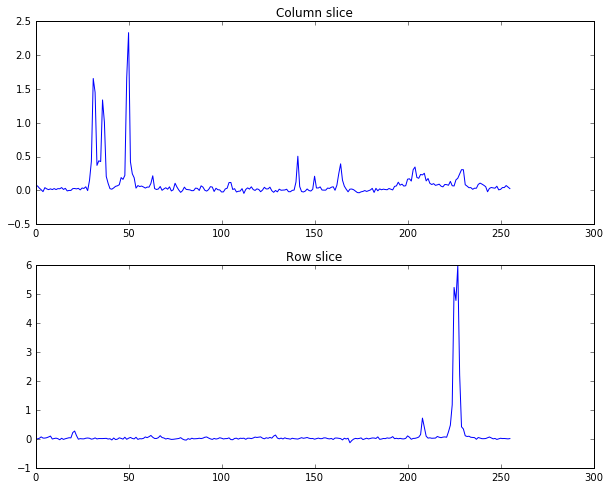

In [30]:
plt.subplot(211)
plt.plot(image[:,src_pixcrd[5][0]])
plt.title('Column slice')
plt.subplot(212)
plt.plot(image[src_pixcrd[5][1],:])
plt.title('Row slice')

In [42]:
reload(func)

<module 'functions' from 'functions.py'>

(208.22281869048618, 163.70710334927577)

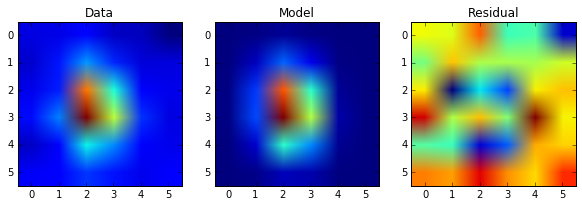

In [43]:
func.gen_center_g2d(src_pixcrd[5][0], src_pixcrd[5][1], 3, 5, 4, 4, 0, image, model_plotting = True)

Trying photutils centroids

In [35]:
data = image[159:169, 204:214]
x, y = centroid_2dg(data)
print x, y

4.23294576888 4.7086631581


### Light curve

In [10]:
lc_data = np.zeros([len(bcd_2506[1::2]), 8])
for i, bcd in enumerate(bcd_2506[1::2]):
    hdu    = fits.open(bcd)
    header = hdu[0].header
    image  = hdu[0].data
    hdu.close()
    
    w = WCS(header)
    src_pixcrd = w.wcs_world2pix(src_crd,1)
    
    row = lc_data[i]
    row[0] = bcd[54:57]
    row[1] = header['MJD_OBS']
    for j, pix in enumerate(src_pixcrd):
        if (pix[0]>0) & (pix[0]<256) & (pix[1]>0) & (pix[1]<256):
            row[j+2] = func.photometry(image, [pix[0]], [pix[1]], rad = 3)[0]

In [11]:
lc = Table(lc_data)[:78]
lc

col0,col1,col2,col3,col4,col5,col6,col7
float64,float64,float64,float64,float64,float64,float64,float64
1.0,53858.4102549,0.0,0.0,0.0,0.0,0.0,3.47021365026
3.0,53858.4107778,0.0,0.0,0.0,0.0,0.0,3.48464246994
5.0,53858.4112778,0.0,0.0,0.0,0.0,0.0,3.45565806006
7.0,53858.4117916,0.0,0.0,0.0,3.05315754732,0.0,0.0
9.0,53858.4123242,0.0,0.0,0.0,0.0,0.0,3.34365809791
11.0,53858.4128334,0.0,0.0,0.0,0.0,0.0,3.74570959717
13.0,53858.4133426,0.0,0.0,0.0,0.0,0.0,0.0
15.0,53858.4138472,0.0,0.0,0.0,0.0,0.0,3.69034653173
17.0,53858.4143981,0.0,0.0,0.0,0.0,0.0,0.0


(array([ 53858.41 ,  53858.415,  53858.42 ,  53858.425,  53858.43 ,
         53858.435,  53858.44 ,  53858.445,  53858.45 ,  53858.455]),
 <a list of 10 Text xticklabel objects>)

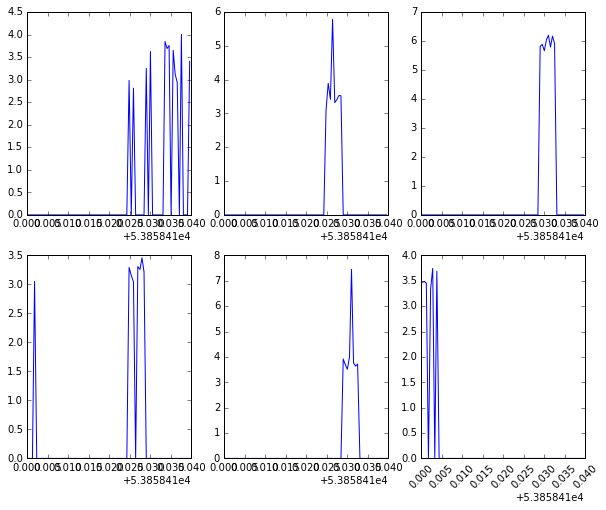

In [12]:
mpld3.disable_notebook()
fig, ax = plt.subplots(2,3)
ax[0,0].plot(lc['col1'], lc['col2'])
ax[0,1].plot(lc['col1'], lc['col3'])
ax[0,2].plot(lc['col1'], lc['col4'])
ax[1,0].plot(lc['col1'], lc['col5'])
ax[1,1].plot(lc['col1'], lc['col6'])
ax[1,2].plot(lc['col1'], lc['col7'])
plt.xticks(rotation=45)

# BCD 2420

In [14]:
bcd_2420 = np.sort(glob.glob("../ngc2420/unzipped_AORs/ch1/bcd/*_bcd.fits"))
hdu = fits.open(bcd_2420[0]) 
header = hdu[0].header
image = hdu[0].data

IndexError: index 0 is out of bounds for axis 0 with size 0